In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Health_Sleep_Statistics.csv')
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


In [ ]:
df.size

1200

In [ ]:
df.columns.size

12

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [ ]:
df.describe()


,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [ ]:
df.isnull().sum()

,0
User ID,0
Age,0
Gender,0
Sleep Quality,0
Bedtime,0
Wake-up Time,0
Daily Steps,0
Calories Burned,0
Physical Activity Level,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

0

### **I have deleted the uer_id column**

In [ ]:
df

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


### **Age vs Sleep Quality**

In [ ]:
age_sleep_corr=df[['Age','Sleep Quality']].corr()
age_sleep_corr

,Age,Sleep Quality
Age,1.000000,-0.848356
Sleep Quality,-0.848356,1.000000


In [ ]:
age_sleep_corr['Age']

,Age
Age,1.000000
Sleep Quality,-0.848356


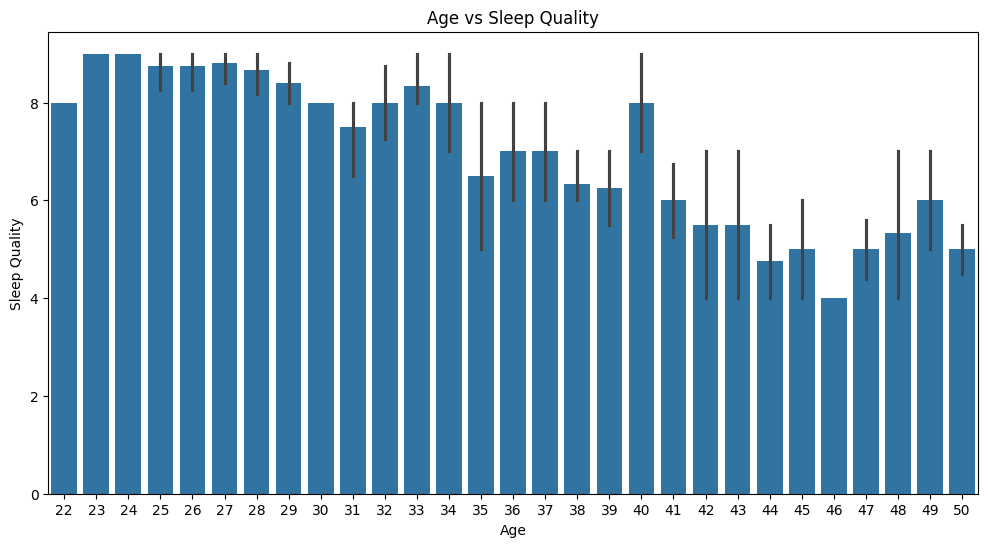

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age',y='Sleep Quality',data=df)
plt.xlabel('Age')
plt.ylabel('Sleep Quality')
plt.title('Age vs Sleep Quality')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
age_sleep_quality_model=LinearRegression()
x=df[['Age']]
y=df['Sleep Quality']
age_sleep_quality_model.fit(x,y)

LinearRegression()

In [ ]:
age_sleep_quality_model.intercept_

13.268812023190648

In [ ]:
age_sleep_quality_model.coef_

array([-0.17408531])

In [ ]:
age_sleep_quality_predictions=age_sleep_quality_model.predict(x)


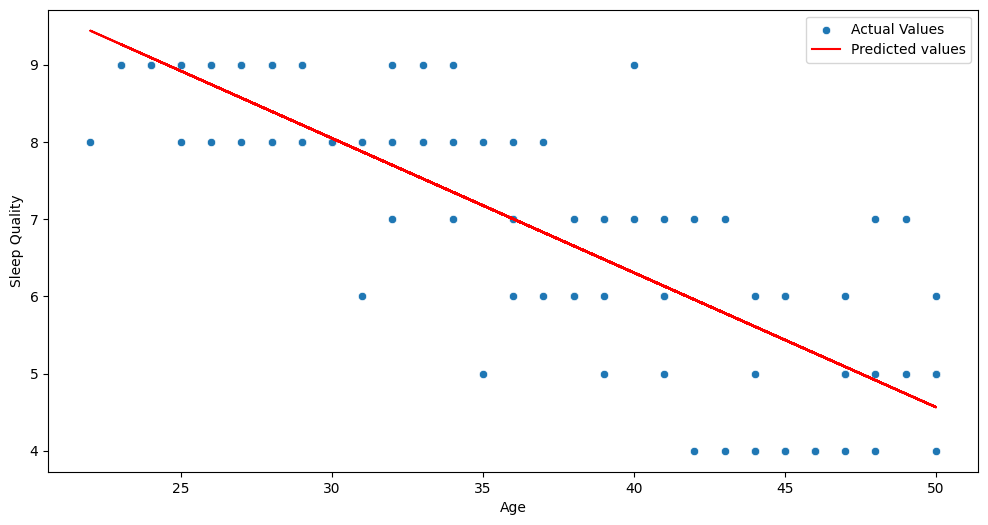

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Sleep Quality',data=df, label='Actual Values')
plt.plot(x,age_sleep_quality_predictions,color='red',label='Predicted values')
plt.legend()
plt.show()

### **Physical Activity Level vs Sleep Quality**

In [ ]:
df['Physical Activity Level'].head()

,Physical Activity Level
0,medium
1,low
2,high
3,low
4,high


In [ ]:
df['Sleep Quality'].head()

,Sleep Quality
0,8
1,7
2,9
3,5
4,8


In [ ]:
df['Gender'].head()

,Gender
0,f
1,m
2,f
3,m
4,f


<Axes: xlabel='Gender', ylabel='Sleep Quality'>

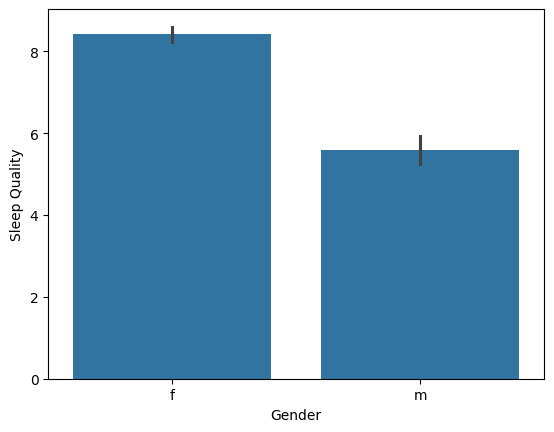

In [ ]:
sns.barplot(x='Gender',y='Sleep Quality',data=df)

<Axes: xlabel='Physical Activity Level', ylabel='Sleep Quality'>

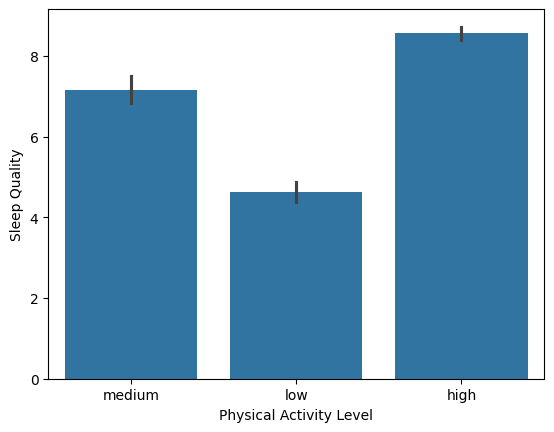

In [ ]:
sns.barplot(x='Physical Activity Level',y='Sleep Quality',data=df)

In [ ]:
custom_code={'low': 1, 'medium': 2, 'high': 3}
df['Physical Activity Level']=df['Physical Activity Level'].map(custom_code)
df

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,2,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,1,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,3,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,1,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,3,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...
95,43,m,7,00:45,07:15,6500,2400,2,medium,no,no
96,33,f,8,23:15,06:15,8500,2600,3,medium,no,no
97,46,m,4,01:30,07:00,3000,2000,1,unhealthy,yes,yes
98,25,f,9,22:15,06:45,9500,2700,3,healthy,no,no


<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

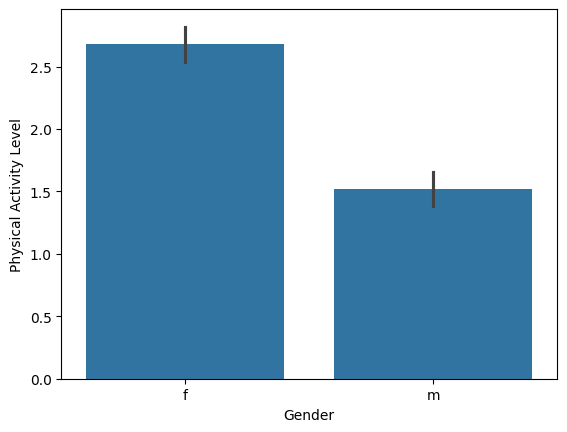

In [ ]:
sns.barplot(x='Gender',y='Physical Activity Level',data=df)

### **Here we are trying to prove the hypothesis - Sleep quality of Females good because they have good physical activity**

In [ ]:
from scipy import stats
sleep_quality_males=df[df['Gender']=='m']['Sleep Quality']
sleep_quality_females=df[df['Gender']=='f']['Sleep Quality']

Physical_Activity_males=df[df['Gender']=='m']['Physical Activity Level']
Physical_Activity_females=df[df['Gender']=='f']['Physical Activity Level']

#### **Finding T and P values for Sleep Quality vs Gender and Physical Activity Level vs Gender**
## the t_value is higher and p_value is lower so, it proves the hypothesis true

In [ ]:
t_sleep_quality,p_sleep_quality=stats.ttest_ind(sleep_quality_males,sleep_quality_females)
print(f"t_stats value for sleep quality vs Gender :{t_sleep_quality:.2f}")
print(f"p_value for sleep quality vs Gender :{p_sleep_quality:.2f}")

t_stats value for sleep quality vs Gender :-14.32
p_value for sleep quality vs Gender :0.00


In [ ]:
t_physical_activity,p_physical_activity=stats.ttest_ind(Physical_Activity_males,Physical_Activity_females)
print(f"t_stats value for Physical Activity Level vs Gender :{t_physical_activity:.2f}")
print(f"p_value for Physical Activity Level vs Gender :{p_physical_activity:.2f}")

t_stats value for Physical Activity Level vs Gender :-10.98
p_value for Physical Activity Level vs Gender :0.00


###** Time of Sleep and waking up vs Sleep Quality**

In [ ]:
df['Bedtime'].head()

,Bedtime
0,23:00
1,00:30
2,22:45
3,01:00
4,23:30


In [ ]:
df['Wake-up Time'].head()

,Wake-up Time
0,06:30
1,07:00
2,06:45
3,06:30
4,07:00


In [ ]:
def sleep_time_helper(str_time):
    h, m = str_time.split(':')
    return int(h) + int(m) / 60

df['Bedtime'] = df['Bedtime'].apply(sleep_time_helper)
df['Wake-up Time'] = df['Wake-up Time'].apply(sleep_time_helper)

In [ ]:
df['Bedtime'].head()


,Bedtime
0,23.00
1,0.50
2,22.75
3,1.00
4,23.50


In [ ]:
df['sleep_duration_hrs']=(df['Wake-up Time']-df['Bedtime']) %24
df['sleep_duration_hrs'].head()

,sleep_duration_hrs
0,7.5
1,6.5
2,8.0
3,5.5
4,7.5


In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,sleep_duration_hrs
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

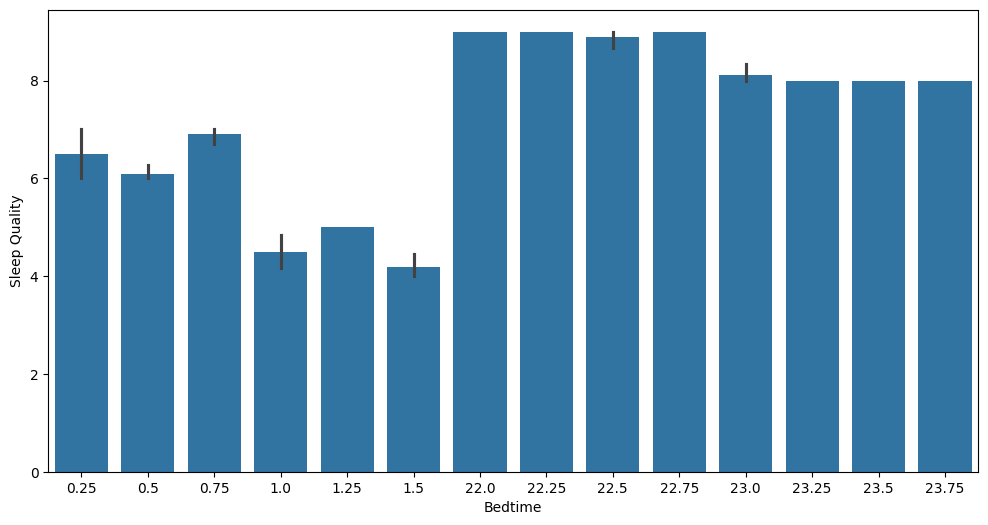

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Bedtime',y='Sleep Quality',data=df)

<Axes: xlabel='Wake-up Time', ylabel='Sleep Quality'>

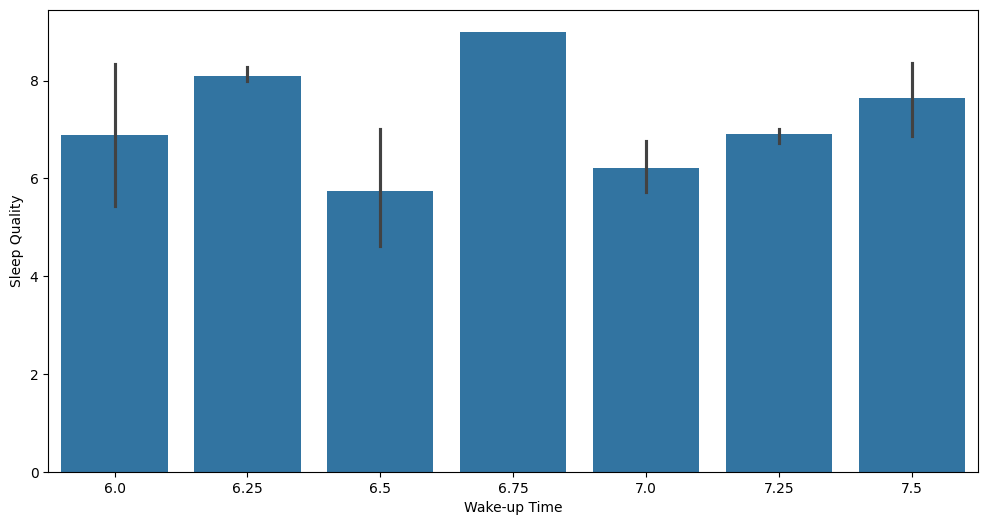

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Wake-up Time',y='Sleep Quality',data=df)

<Axes: xlabel='sleep_duration_hrs', ylabel='Sleep Quality'>

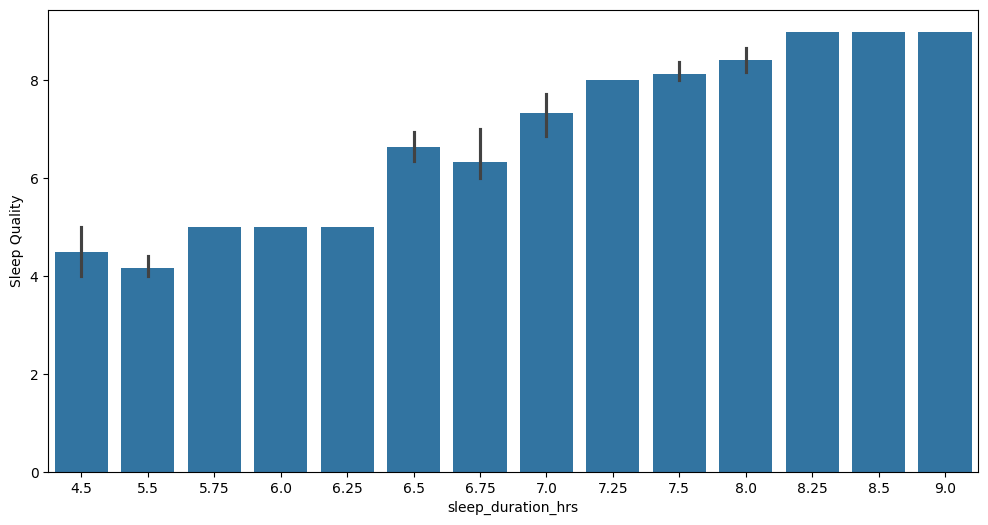

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='sleep_duration_hrs',y='Sleep Quality',data=df)

In [ ]:
sleep_duration_quality_model=LinearRegression()
x=df[['sleep_duration_hrs']]
y=df['Sleep Quality']
sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [ ]:
sleep_duration_quality_model.coef_

array([1.36940999])

In [ ]:
sleep_duration_quality_model.intercept_

-2.575599349763152

In [ ]:
predictions=sleep_duration_quality_model.predict(x)

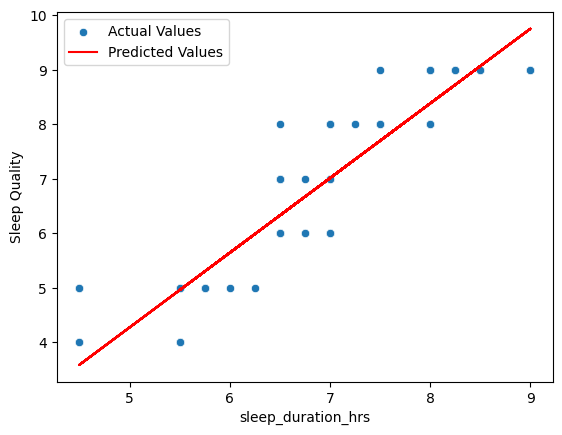

In [ ]:
plt.figsize=(12,6)
sns.scatterplot(x='sleep_duration_hrs',y='Sleep Quality',data=df,label='Actual Values')
plt.plot(x,predictions,color='red',label='Predicted Values')
plt.legend()

In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,sleep_duration_hrs
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


### Sleep disorders vs sleep Qaulity

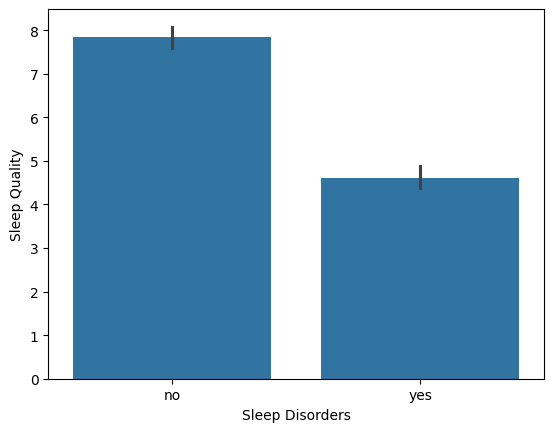

In [ ]:
plt.figsize=(12,6)
sns.barplot(x='Sleep Disorders',y='Sleep Quality',data=df)
plt.show()

In [ ]:
df_nums=df.select_dtypes(include=['int64','float64'])
df_nums.head()


,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,sleep_duration_hrs
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,1,6.5
2,29,9,22.75,6.75,9000,2700,3,8.0
3,41,5,1.00,6.50,4000,2100,1,5.5
4,22,8,23.50,7.00,10000,2800,3,7.5


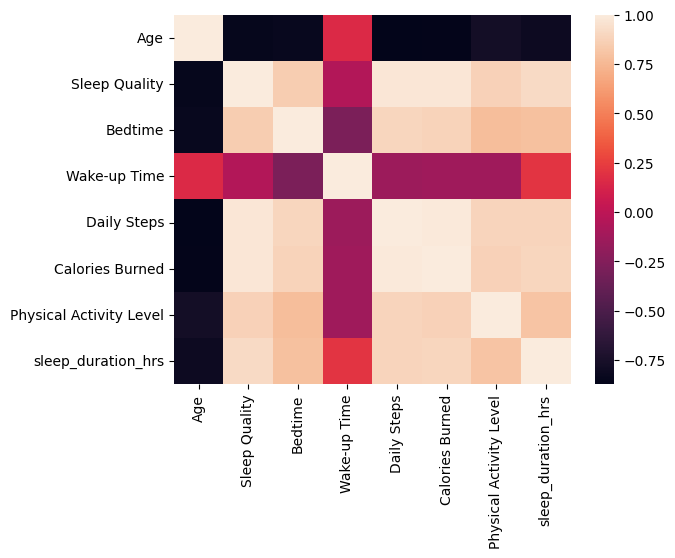

In [ ]:
plt.figsize=(12,6)
sns.heatmap(df_nums.corr())
plt.show()


In [ ]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,sleep_duration_hrs
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,1,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,3,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,1,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,3,medium,no,no,7.5


### **Calories burned vs sleep quality**

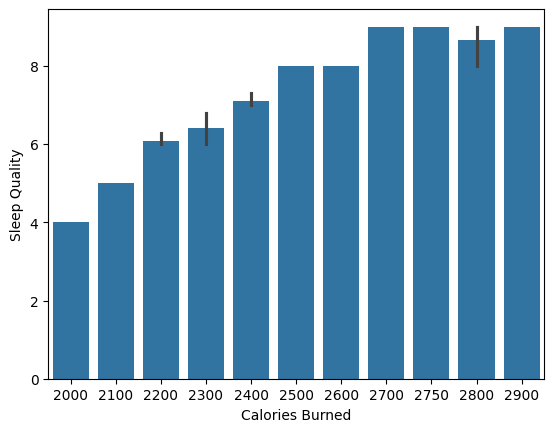

In [ ]:
plt.figsize=(12,6)
sns.barplot(x='Calories Burned',y='Sleep Quality',data=df)
plt.show()

In [ ]:
calories_burnt_model=LinearRegression()
x=df[['Calories Burned']]
y=df['Sleep Quality']
calories_burnt_model.fit(x,y)

LinearRegression()

In [ ]:
calories_burnt_model.coef_

array([0.00600954])

In [ ]:
calories_burnt_model.intercept_

-7.5490928154048795

<Axes: xlabel='Calories Burned', ylabel='Sleep Quality'>

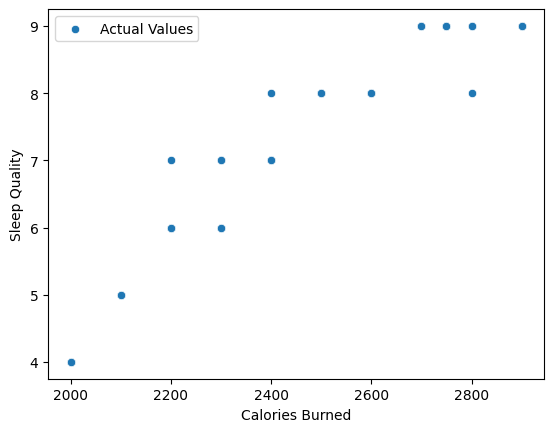

In [ ]:
plt.figsize=(12,6)
sns.scatterplot(x='Calories Burned',y='Sleep Quality',data=df,label='Actual Values')

In [ ]:
predictions=calories_burnt_model.predict(x)

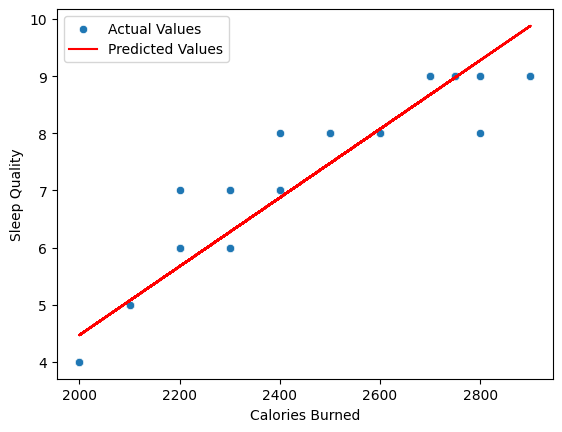

In [ ]:
plt.figsize=(12,6)
sns.scatterplot(x='Calories Burned',y='Sleep Quality',data=df,label='Actual Values')
plt.plot(x,predictions,color='red',label='Predicted Values')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score

r2_score(y,predictions)

0.9478131260919267

### Dietery Habits vs Sleep_Quality

In [ ]:
df['Dietary Habits'].value_counts()

,count
Dietary Habits,
unhealthy,41
medium,30
healthy,29


In [ ]:
custom_code={'unhealthy': 1,'medium':2,'healthy':3}
df['Dietary Habits']=df['Dietary Habits'].map(custom_code)

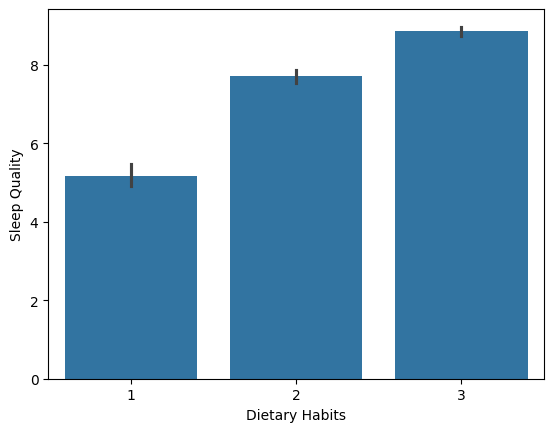

In [ ]:
plt.figsize=(12,6)
sns.barplot(x='Dietary Habits',y='Sleep Quality',data=df)
plt.show()

### **Sleep Disorder vs Sleep Quality**

In [ ]:
df['Sleep Disorders'].value_counts()

,count
Sleep Disorders,
no,74
yes,26


In [ ]:
sleep_disorder_sleep_quality_summary=df.groupby('Sleep Disorders').agg({'Sleep Quality':['mean','std'],'Physical Activity Level' : lambda x:x.value_counts().to_dict()
})
sleep_disorder_sleep_quality_summary

Sleep Quality           Physical Activity Level
                         mean       std                <lambda>
Sleep Disorders                                                
no                   7.837838  1.085736          {2: 38, 3: 36}
yes                  4.615385  0.697247                 {1: 26}

### **Medication Vs Sleep Quality**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

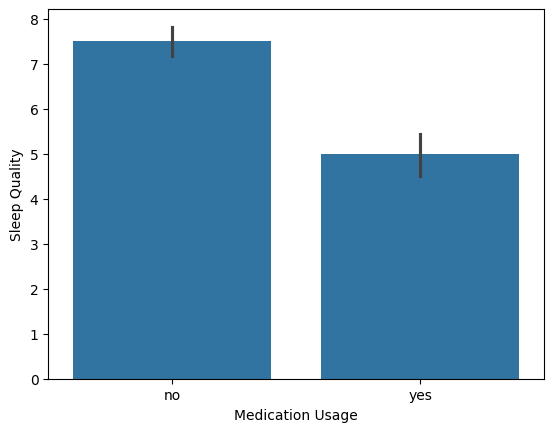

In [ ]:
plt.figsize=(12,6)
sns.barplot(x='Medication Usage',y='Sleep Quality',data=df)
plt

In [ ]:
Yes_Medication_sleep_quality=df[df['Medication Usage']=='yes']['Sleep Quality']
No_Medication_sleep_quality=df[df['Medication Usage']=='no']['Sleep Quality']
t_stat,p_val=stats.ttest_ind(Yes_Medication_sleep_quality,No_Medication_sleep_quality,equal_var=False)
print(f"t_stats value for Medication Usage vs Sleep Quality :{t_stat:.2f}")
print(f"p_value for Medication Usage vs Sleep Quality :{p_val:.2f}")

t_stats value for Medication Usage vs Sleep Quality :-8.08
p_value for Medication Usage vs Sleep Quality :0.00
